In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('csv/gameandgrade.csv')

In [3]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB


In [5]:
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")

In [6]:
X = df.drop(columns=["Grade"])
y = df["Grade"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ValueError: Input contains NaN.

In [11]:
mse, r2

NameError: name 'mse' is not defined

In [12]:
missing_values_X = X.isnull().sum().sum()
missing_values_y = y.isnull().sum()

missing_values_X, missing_values_y

(np.int64(0), np.int64(1))

In [13]:
X.dtypes, y.dtypes

(Sex                 int64
 School Code         int64
 Playing Years       int64
 Playing Often       int64
 Playing Hours       int64
 Playing Games       int64
 Parent Revenue      int64
 Father Education    int64
 Mother Education    int64
 dtype: object,
 dtype('float64'))

In [14]:
inf_values_X = np.isinf(X).sum().sum()
inf_values_y = np.isinf(y).sum()

inf_values_X, inf_values_y

(np.int64(0), np.int64(0))

In [15]:
y_test.shape, y_pred.shape

((154,), (154,))

In [16]:
nan_values_y_test = np.isnan(y_test).sum()
nan_values_y_pred = np.isnan(y_pred).sum()

nan_values_y_test, nan_values_y_pred

(np.int64(1), np.int64(0))

In [17]:
y_test = np.array(y_test, dtype=np.float64)
y_pred = np.array(y_pred, dtype=np.float64)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

ValueError: Input contains NaN.

In [19]:
print("NaN in y_test:", np.isnan(y_test).sum())
print("NaN in y_pred:", np.isnan(y_pred).sum())

NaN in y_test: 1
NaN in y_pred: 0


In [20]:
mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]

In [21]:
imputer = SimpleImputer(strategy="mean")  
y_test = imputer.fit_transform(y_test.reshape(-1, 1)).flatten()
y_pred = imputer.fit_transform(y_pred.reshape(-1, 1)).flatten()

NameError: name 'SimpleImputer' is not defined

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") 
y_test = imputer.fit_transform(y_test.reshape(-1, 1)).flatten()
y_pred = imputer.fit_transform(y_pred.reshape(-1, 1)).flatten()


In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 220.35448359978105
R²: 0.28195405291590003


In [24]:
missing_values = df.isnull().sum()

In [25]:
df_cleaned = df.dropna(subset=["Grade"])

In [26]:
df_cleaned.isnull().sum(), df_cleaned.shape

(Sex                 0
 School Code         0
 Playing Years       0
 Playing Often       0
 Playing Hours       0
 Playing Games       0
 Parent Revenue      0
 Father Education    0
 Mother Education    0
 Grade               0
 dtype: int64,
 (769, 10))

In [27]:
X = df_cleaned.drop(columns=["Grade"])
y = df_cleaned["Grade"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [32]:
mse, r2

(225.87268442426662, 0.2425593559698016)

In [34]:
import statsmodels.api as sm

# Assuming X is the predictor variables and y is the target variable
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit() 
print(model.summary()) 


                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     25.94
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.79e-39
Time:                        21:17:58   Log-Likelihood:                -3144.0
No. Observations:                 769   AIC:                             6308.
Df Residuals:                     759   BIC:                             6354.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               56.9399      2.405  

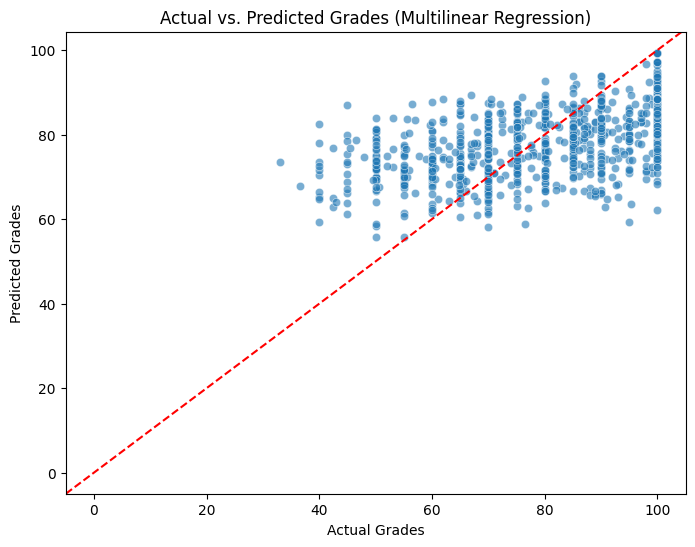

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X)  # Predictions from the model

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Grades (Multilinear Regression)")
plt.axline([0, 0], slope=1, color="red", linestyle="--")  # Ideal fit line
plt.show()

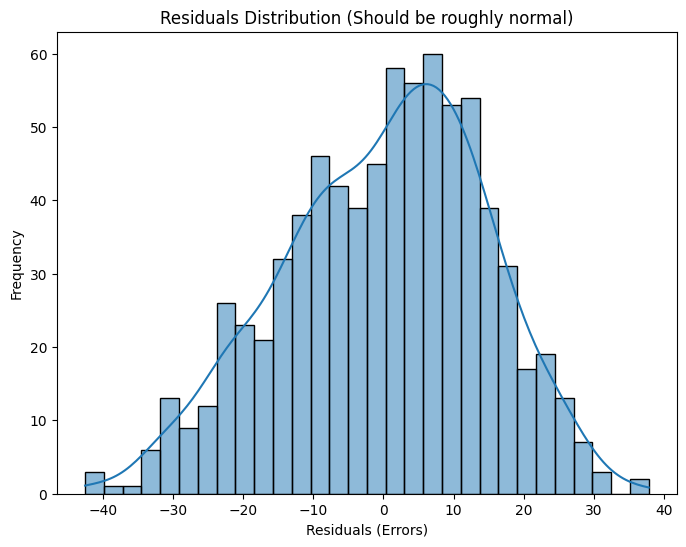

In [36]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Should be roughly normal)")
plt.show()


Sample of Actual vs. Predicted Grades:
   Actual Grades  Predicted Grades
0           77.5         77.074998
1           83.0         67.401327
2           80.0         74.423381
3           45.0         72.921291
4           85.0         66.607429
5           80.0         68.615218
6           55.0         68.015221
7           80.0         73.733507
8           60.0         70.679484
9           88.0         75.484042


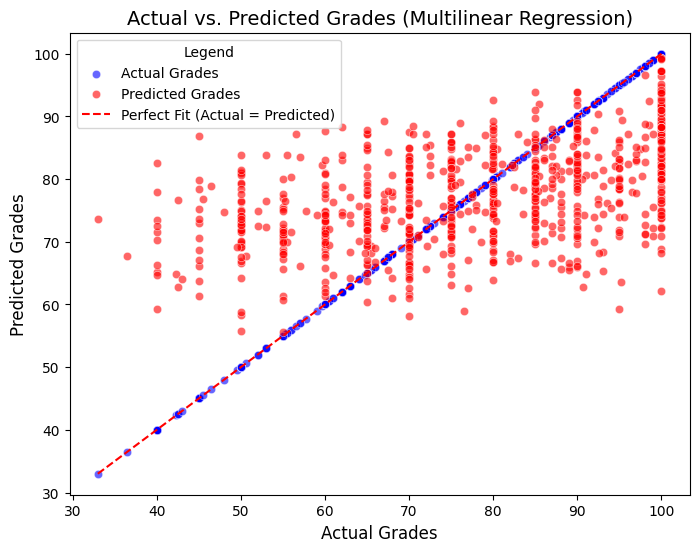

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dataframe
results_df = pd.DataFrame({"Actual Grades": y, "Predicted Grades": y_pred})

plt.figure(figsize=(8, 6))

# Plot actual grades in blue
sns.scatterplot(x=y, y=y, alpha=0.6, color="blue", label="Actual Grades", marker="o")  

# Plot predicted grades in red
sns.scatterplot(x=y, y=y_pred, alpha=0.6, color="red", label="Predicted Grades", marker="o")  

# Add the perfect fit line (where actual = predicted)
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--", label="Perfect Fit (Actual = Predicted)")

# Add labels and title
plt.xlabel("Actual Grades", fontsize=12)
plt.ylabel("Predicted Grades", fontsize=12)
plt.title("Actual vs. Predicted Grades (Multilinear Regression)", fontsize=14)

# Add a legend
plt.legend(title="Legend")

# Display the first few rows of actual vs. predicted values
print("Sample of Actual vs. Predicted Grades:")
print(results_df.head(10))  # Display first 10 rows

# Show the plot
plt.show()


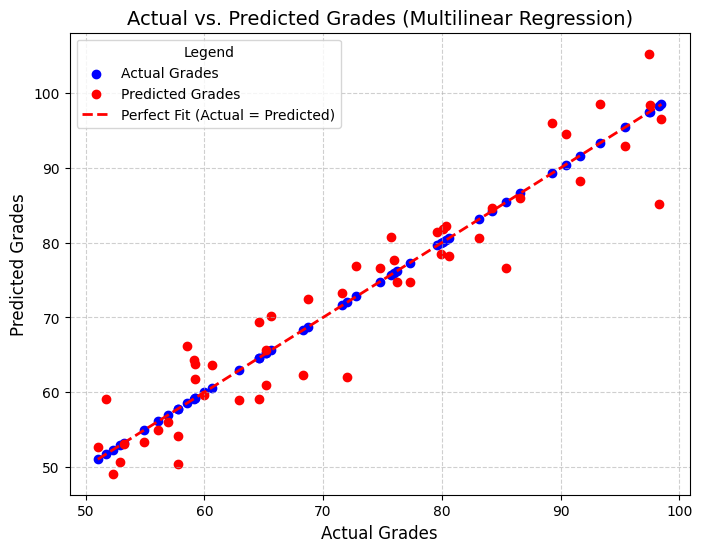

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual and predicted values
np.random.seed(42)
y_actual = np.random.uniform(50, 100, 50)  # Simulated actual grades
y_predicted = y_actual + np.random.normal(0, 5, 50)  # Simulated predictions with some noise

plt.figure(figsize=(8, 6))

# Scatter plot of actual grades (blue)
plt.scatter(y_actual, y_actual, color="blue", label="Actual Grades", marker="o")

# Scatter plot of predicted grades (red)
plt.scatter(y_actual, y_predicted, color="red", label="Predicted Grades", marker="o")

# Perfect Fit Line (y = x) in red dashed
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], linestyle="--", color="red", linewidth=2, label="Perfect Fit (Actual = Predicted)")

# Formatting: grid, labels, and title
plt.xlabel("Actual Grades", fontsize=12)
plt.ylabel("Predicted Grades", fontsize=12)
plt.title("Actual vs. Predicted Grades (Multilinear Regression)", fontsize=14)
plt.legend(title="Legend")

# Adding grid for graph-like appearance
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()
